In [4]:
import time

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [5]:
# SPDX-License-Identifier: BSD-3-Clause
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# # Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Sparsity with L1 penalty: 78.27%
Test score with L1 penalty: 0.8293
Example run in 9.311 s


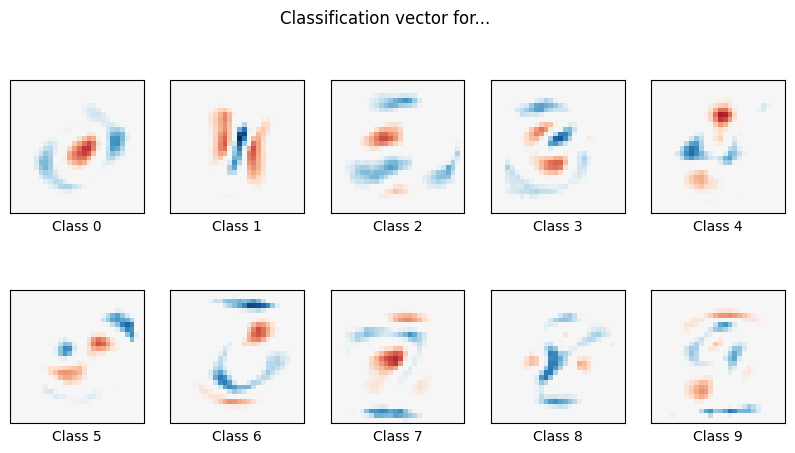

In [6]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
(clf.score(X_test, y_test))


0.8803

In [8]:
# FFNN from Sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2 hidden layers (100 neurons each)
ffnn = MLPClassifier(hidden_layer_sizes=(200, 200), activation='relu', solver='adam', max_iter=50)
ffnn.fit(X_train, y_train)
ffnn.score(X_test, y_test)

0.9338

Epoch 1/50 - Loss: 0.1005
Epoch 2/50 - Loss: 0.0895
Epoch 3/50 - Loss: 0.0890
Epoch 4/50 - Loss: 0.0886
Epoch 5/50 - Loss: 0.0881
Epoch 6/50 - Loss: 0.0875
Epoch 7/50 - Loss: 0.0869
Epoch 8/50 - Loss: 0.0862
Epoch 9/50 - Loss: 0.0855
Epoch 10/50 - Loss: 0.0846
Epoch 11/50 - Loss: 0.0836
Epoch 12/50 - Loss: 0.0826
Epoch 13/50 - Loss: 0.0814
Epoch 14/50 - Loss: 0.0801
Epoch 15/50 - Loss: 0.0787
Epoch 16/50 - Loss: 0.0773
Epoch 17/50 - Loss: 0.0758
Epoch 18/50 - Loss: 0.0743
Epoch 19/50 - Loss: 0.0728
Epoch 20/50 - Loss: 0.0712
Epoch 21/50 - Loss: 0.0696
Epoch 22/50 - Loss: 0.0679
Epoch 23/50 - Loss: 0.0663
Epoch 24/50 - Loss: 0.0646
Epoch 25/50 - Loss: 0.0630
Epoch 26/50 - Loss: 0.0614
Epoch 27/50 - Loss: 0.0598
Epoch 28/50 - Loss: 0.0582
Epoch 29/50 - Loss: 0.0567
Epoch 30/50 - Loss: 0.0553
Epoch 31/50 - Loss: 0.0539
Epoch 32/50 - Loss: 0.0525
Epoch 33/50 - Loss: 0.0512
Epoch 34/50 - Loss: 0.0499
Epoch 35/50 - Loss: 0.0487
Epoch 36/50 - Loss: 0.0475
Epoch 37/50 - Loss: 0.0463
Epoch 38/5

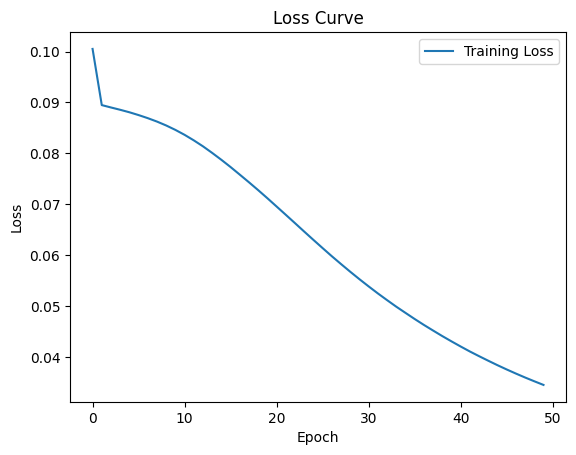

Akurasi pada data uji: 83.34%


In [26]:
from importlib import reload
import main  # Memastikan file 'main' diimpor
reload(main)  # Memuat ulang file main.py
from main import FFNN
from sklearn.preprocessing import OneHotEncoder

def main(X_train, X_test, y_train, y_test):
    n_layer = int(input("Masukkan Jumlah Hidden Layer: "))
    arr_of_layer = [X_train.shape[1]] 
    for i in range(n_layer):
        temp = int(input(f"Masukkan jumlah neuron hidden layer ke-{i+1}: "))
        arr_of_layer.append(temp)
    
    arr_of_layer.append(len(set(y_train))) 

    act_functions = input("Masukkan jenis activation function: ")
    arr_of_act = [act_functions]*(n_layer+1)

    loss_func = input("Masukkan jenis loss function: ")
    
    w_method = input("Masukkan jenis inisialisasi weight: ")
    
    if w_method == 'uniform':
        low_bound = float(input("Masukkan batas bawah untuk uniform distribution: "))
        up_bound = float(input("Masukkan batas atas untuk uniform distribution: "))
        mean = None
        variance = None
    elif w_method == 'normal':
        low_bound = None
        up_bound = None
        mean = float(input("Masukkan nilai mean untuk normal distribution: "))
        variance = float(input("Masukkan nilai variance untuk normal distribution: "))
    else:
        low_bound = None
        up_bound = None
        mean = None
        variance = None

    learning_rate = float(input("Masukkan learning rate: "))
    epochs = int(input("Masukkan jumlah epoch (pembelajaran): "))
    batch_size = int(input("Masukkan jumlah ukuran batch: "))
    reg = input("Apakah menggunakan regularization? (y/n) ")
    reg = reg == 'y'

    if (reg):
        lambda_reg = float(input("Masukkan nilai lambda regularization: "))
    else:
        lambda_reg = None

    verbose = int(input("Masukkan verbose: "))

    rms_n = input("Apakah menggunakan rms norm? (y/n) ")
    rms_n = rms_n == 'y'

    # Membuat model FFNN
    model = FFNN(
        layers=arr_of_layer,
        activation_functions=arr_of_act,
        loss_function=loss_func,
        weight_method=w_method,
        seed=42,
        regularization=None,
        low_bound=low_bound,
        up_bound=up_bound,
        mean=mean,
        variance=variance,
        rms_norm = rms_n,
        lambda_reg=lambda_reg
    )  
   
    model.train(X_train, y_train, epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, verbose=verbose)

    activations, _ = model.forward(X_test)
    y_pred = np.argmax(activations[-1], axis=1)
    encoder = OneHotEncoder(sparse_output=False)
    y_test_encoded = encoder.fit_transform(y_test.reshape(-1, 1))
    y_true = np.argmax(y_test_encoded, axis=1)
    accuracy = np.mean(y_pred == y_true)

    print("Akurasi pada data uji: %.2f%%" % (accuracy * 100))

main(X_train, X_test, y_train, y_test)


Epoch 1/100 - Loss: 0.0894 - Validation Loss: 0.0886 - Validation Accuracy: 0.5019
Epoch 1/100 - Loss: 0.0894
Epoch 2/100 - Loss: 0.0698 - Validation Loss: 0.0673 - Validation Accuracy: 0.6515
Epoch 2/100 - Loss: 0.0698
Epoch 3/100 - Loss: 0.0530 - Validation Loss: 0.0564 - Validation Accuracy: 0.7438
Epoch 3/100 - Loss: 0.0530
Epoch 4/100 - Loss: 0.0435 - Validation Loss: 0.0482 - Validation Accuracy: 0.7886
Epoch 4/100 - Loss: 0.0435
Epoch 5/100 - Loss: 0.0369 - Validation Loss: 0.0417 - Validation Accuracy: 0.8297
Epoch 5/100 - Loss: 0.0369
Epoch 6/100 - Loss: 0.0319 - Validation Loss: 0.0377 - Validation Accuracy: 0.8536
Epoch 6/100 - Loss: 0.0319
Epoch 7/100 - Loss: 0.0276 - Validation Loss: 0.0349 - Validation Accuracy: 0.8670
Epoch 7/100 - Loss: 0.0276
Epoch 8/100 - Loss: 0.0245 - Validation Loss: 0.0323 - Validation Accuracy: 0.8784
Epoch 8/100 - Loss: 0.0245
Epoch 9/100 - Loss: 0.0220 - Validation Loss: 0.0292 - Validation Accuracy: 0.8850
Epoch 9/100 - Loss: 0.0220
Epoch 10/1

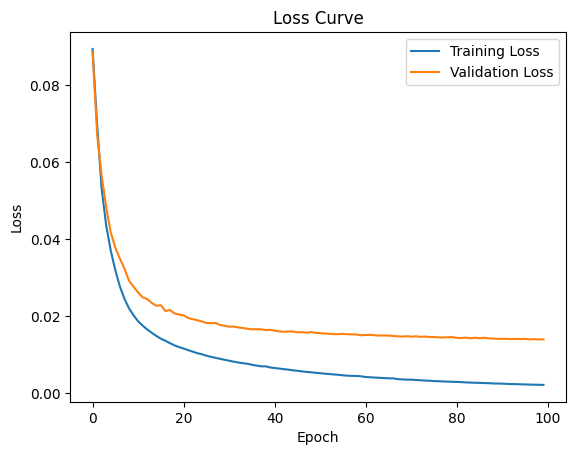

None


In [13]:
from importlib import reload
import main  # Memastikan file 'main' diimpor
reload(main)  # Memuat ulang file main.py
from main import FFNN

ffnn_model = FFNN(
    layers=[X_train.shape[1], 100, 100, 100, 100, 100, len(set(y_train))],  # Input, hidden 1, hidden 2, output
    activation_functions=['swish', 'swish', 'swish', 'swish', 'swish', 'swish'],
    loss_function='mse',
    weight_method='xavier',
    seed=42,
    regularization=None,
    rms_norm=False
)
a = ffnn_model.train(X_train, y_train, X_test, y_test, epochs=100, learning_rate=0.001, batch_size=200)
print(a)

Bawah ngetes bonus

In [ ]:
# L1 regularisation (Lasso)
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(X_test,y_test)

-0.0002375437494799293

In [ ]:
# L2 regularisation (Ridge)
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(X_test,y_test)

-1.9293922899402767

In [ ]:
from utils import RMSNorm

# Contoh penggunaan RMSNorm
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])  # Contoh input 2D
rmsnorm = RMSNorm(dim=x.shape[1])  # Inisialisasi dengan dimensi yang sesuai (3 fitur)
output = rmsnorm(x)  # Terapkan RMSNorm
print(output)


[[0.46291005 0.9258201  1.38873015]
 [0.78954203 0.98692754 1.18431305]]
